<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Основная-часть" data-toc-modified-id="Основная-часть-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Основная часть</a></span></li><li><span><a href="#Дополнительная-часть" data-toc-modified-id="Дополнительная-часть-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Дополнительная часть</a></span></li></ul></li></ul></li><li><span><a href="#Описания-полей" data-toc-modified-id="Описания-полей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описания полей</a></span></li><li><span><a href="#Задание-1.1-Seaborn" data-toc-modified-id="Задание-1.1-Seaborn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 1.1 Seaborn</a></span></li></ul></div>

# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

In [4]:
df.nunique()

age                       84
gender                     2
city_type                  5
full_mob                 185
ml_balance               575
cl_balance_0m           8177
loan_balance_0m        11077
td_balance_0m           1434
casa_balance_0m        36395
dc_trx_cnt              1204
dc_trx_sum             29266
income                 19630
min_casa_balance_1q    31824
max_casa_balance_1q    40854
avg_casa_balance_1Y    44790
min_td_balance_1q       1307
max_td_balance_1q       1532
avg_td_balance_1Y       2455
min_loan_balance_1q    10385
max_loan_balance_1q    11779
avg_loan_balance_1Y    13105
min_cl_balance_1q       7766
max_cl_balance_1q       8444
avg_cl_balance_1Y       9530
loan_to_deposit          346
Avg_trx                29748
avgtrx_to_balance      31399
nbi                    47242
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

# Задание 1.1 Seaborn

In [6]:
# Эта команда позволяет вывыводить результаты друг за другом без вызова print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

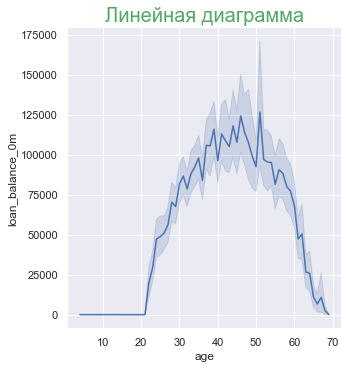

In [9]:
# Линейная диаграмма один к одному для сравниваемых показателей

sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='loan_balance_0m', 
    data=df.query("age < 70"), 
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

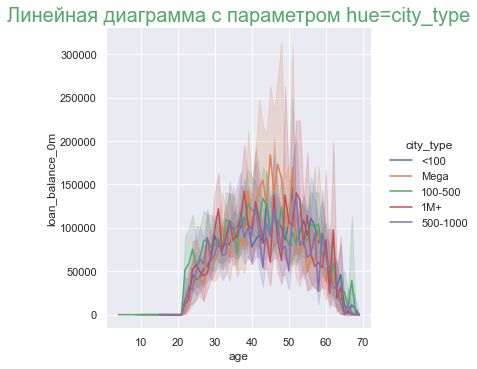

In [10]:
day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    x='age', 
    y='loan_balance_0m', 
    hue='city_type', 
    hue_order=day_order,
    data=df.query("age < 70"), kind='line')
plt.title('Линейная диаграмма с параметром hue=city_type', size=20, color='g');

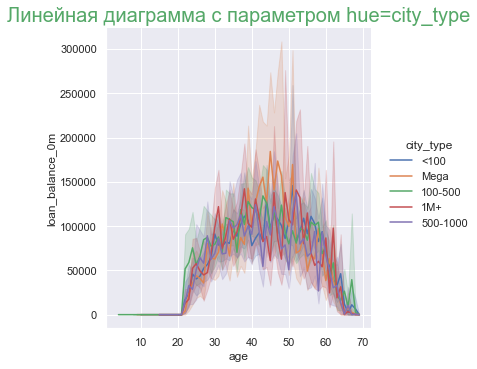

In [11]:
sns.relplot(x='age',
            y='loan_balance_0m',
            hue='city_type',
            hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'],
            data=df.query("age < 70"), kind='line')
plt.title('Линейная диаграмма c параметром hue=city_type', size=20, color='g');

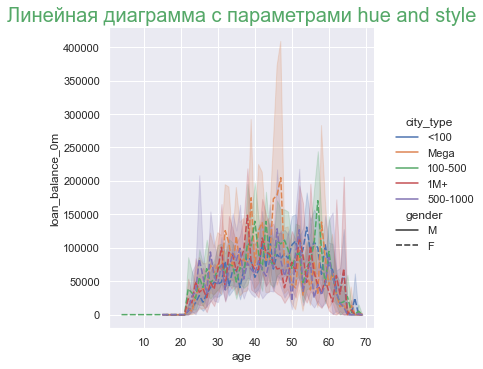

In [12]:
sns.relplot(
    x='age', 
    y='loan_balance_0m',
    hue='city_type', 
    hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'], 
    style='gender', 
    style_order=['M', 'F'], 
    kind='line', 
    data=df.query("age < 70"))
plt.title('Линейная диаграмма c параметрами hue and style', size=20, color='g')

plt.show();

In [7]:
a = df.ml_balance
c = []
for i in a:
    if i == 0.0:
        c.append('N')
    else:
        c.append('Y')
df["IpotekaY/N"] = c
df["IpotekaY/N"].unique()

array(['N', 'Y'], dtype=object)

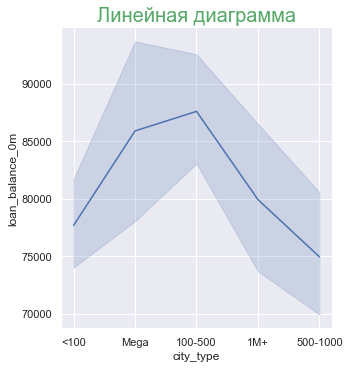

In [14]:
# Линейные диаграммы с отношением один ко многим

sns.relplot(
    x='city_type', 
    y='loan_balance_0m', 
    data=df, 
    kind='line')
plt.title('Линейная диаграмма', size=20, color='g');

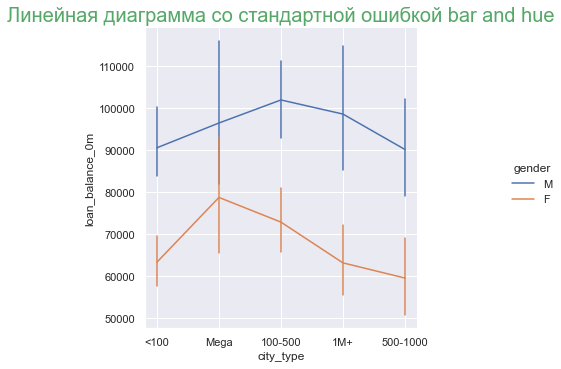

In [15]:
sns.relplot(
    x='city_type', 
    y='loan_balance_0m', 
    hue='gender', 
    data=df, 
    kind='line',
    err_style="bars", 
    ci=99)   # Standard Errors
plt.title('Линейная диаграмма со стандартной ошибкой bar and hue', size=20, color='g');

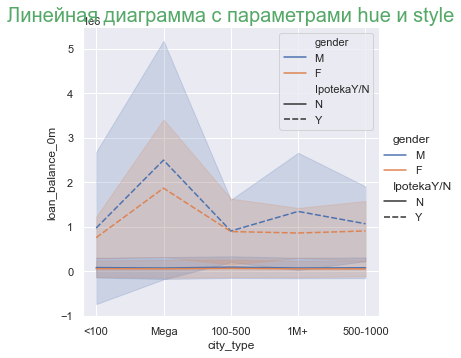

In [16]:
sns.relplot(
    x='city_type', 
    y='loan_balance_0m',
    hue='gender',
    style='IpotekaY/N', 
    kind='line', 
    ci='sd', 
    data=df)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');
plt.legend();

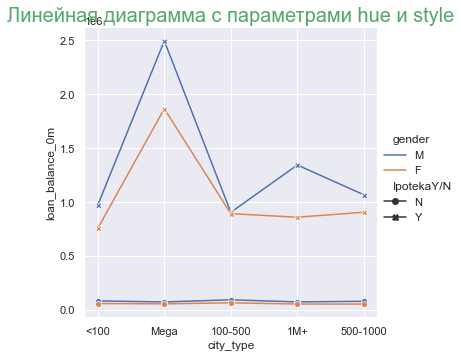

In [17]:
sns.relplot(
    x='city_type', 
    y='loan_balance_0m',
    hue='gender',
    style='IpotekaY/N',
    dashes=False, 
    markers=True,
    data=df, 
    kind='line', 
    ci=None)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

In [8]:
df_1 = df[['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'avgtrx_to_balance', 'income', 'IpotekaY/N']]
df_1.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,avgtrx_to_balance,income,IpotekaY/N
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,NaN,0.0,N
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,NaN,0.0,N
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,0.083467,0.0,N
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,NaN,0.0,N
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,NaN,0.0,N


In [ ]:
age возраст
gender пол repexc_date
city_type Тип города проживания клиента
full_mob Длительность взаимоотношений с банком
ml_balance ипотека
cl_balance_0m потребительский кредит
loan_balance_0m все кредиты
td_balance_0m депозит
casa_balance_0m счета
avgtrx_to_balance
income доход клиента
IpotekaY/N

In [9]:
# Создание длинного датафрейма из датафрейма широкой формы

long_sales = pd.melt(df_1, var_name='Item', value_name='Sales',
            id_vars=['age', 'gender', 'city_type', 'full_mob', 'avgtrx_to_balance', 'income', 'IpotekaY/N'])
long_sales.shape         
long_sales.head()

(250000, 9)

,age,gender,city_type,full_mob,avgtrx_to_balance,income,IpotekaY/N,Item,Sales
0,71,NaN,<100,103,NaN,0.0,N,ml_balance,0.0
1,49,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
2,56,NaN,Mega,81,0.083467,0.0,N,ml_balance,0.0
3,47,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
4,74,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0


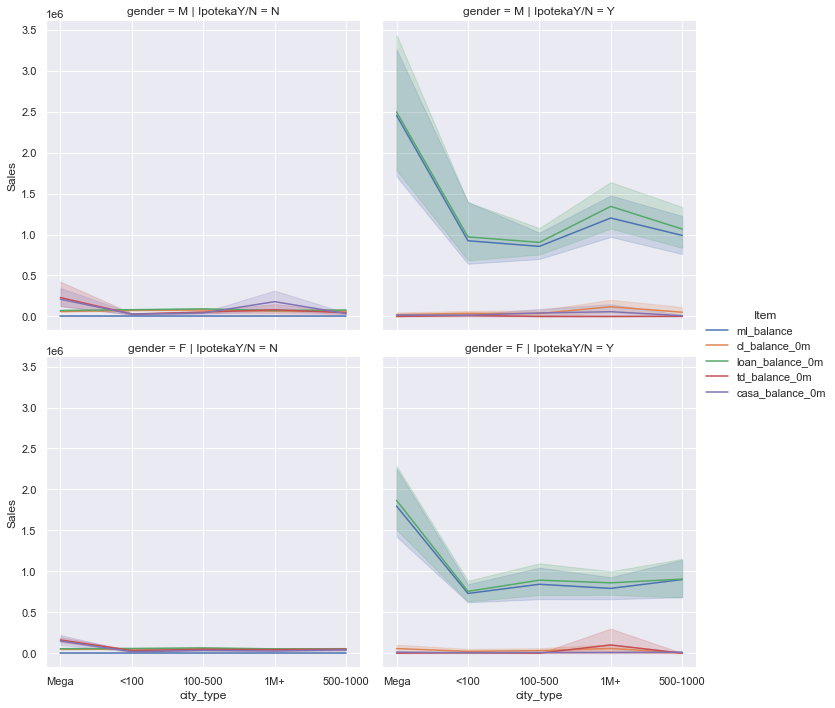

In [20]:
# Линейные диаграммы из датафрейма длинной формы

g = sns.relplot(
    x='city_type', 
    y='Sales', 
    data=long_sales, 
    kind='line', 
    hue='Item', 
    row='gender', 
    col='IpotekaY/N')

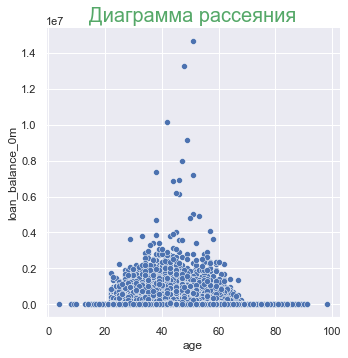

In [24]:
# Scatterplot()

sns.relplot(
    x='age',
    y='loan_balance_0m',
    data=df,
#     kind='scatter'
#     kind='line'
)
plt.title('Диаграмма рассеяния', size=20, color='g');

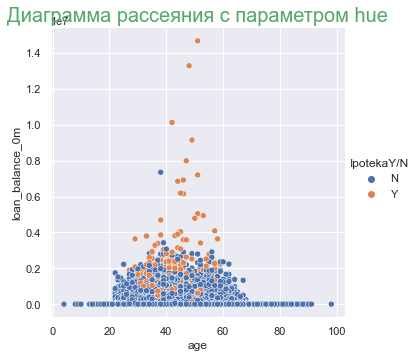

In [26]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    hue='IpotekaY/N', 
    data=df)
plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

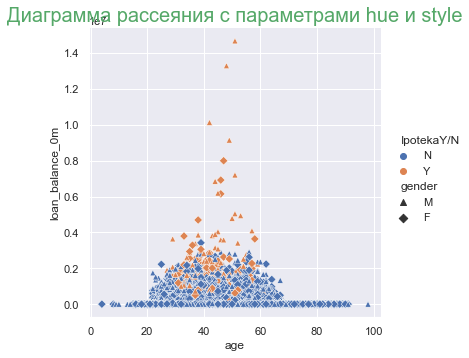

In [27]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    hue='IpotekaY/N', 
    style='gender', 
    markers=['^', 'D'],
    data=df)
plt.title('Диаграмма рассеяния с параметрами hue и style', size=20, color='g');

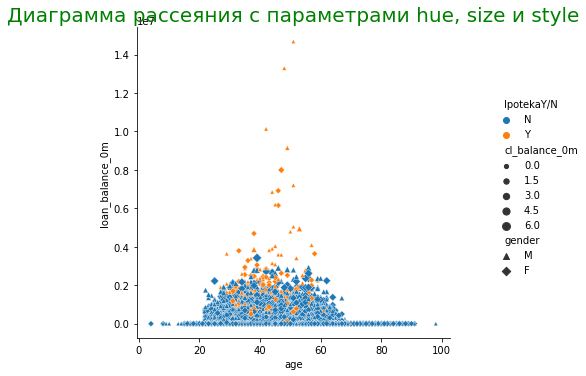

In [11]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    hue='IpotekaY/N', 
    style='gender', 
    size='cl_balance_0m',
    markers=['^', 'D'],
    data=df
)

plt.title('Диаграмма рассеяния с параметрами hue, size и style', size=20, color='g');

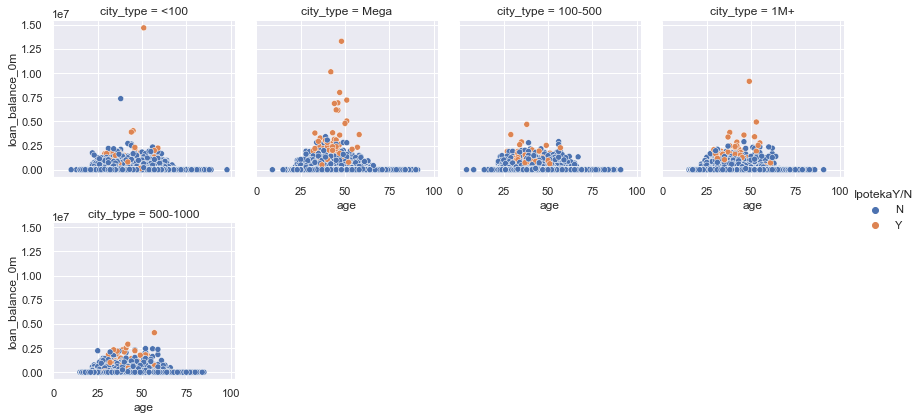

In [37]:
# Диаграмма рассеяния с параметром Hue и дополнительными переменными

day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    x='age',
    y='loan_balance_0m',
    hue='IpotekaY/N',
    col='city_type',
    col_wrap=4,
    col_order=day_order,
    data=df,
    height=3
);

In [ ]:
age возраст
gender пол repexc_date
city_type Тип города проживания клиента
full_mob Длительность взаимоотношений с банком
ml_balance ипотека
cl_balance_0m потребительский кредит
loan_balance_0m все кредиты
td_balance_0m депозит
casa_balance_0m счета
avgtrx_to_balance
income доход клиента
IpotekaY/N

In [36]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

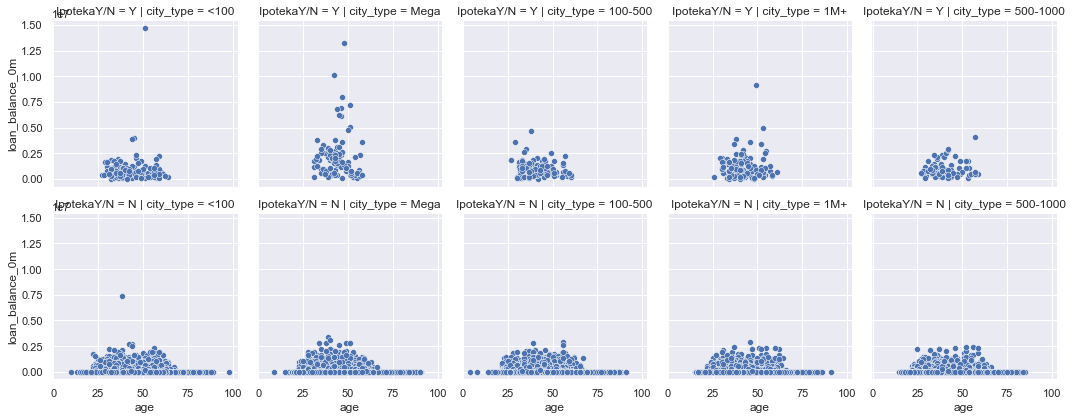

In [38]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    col='city_type',
    col_order=day_order,
    row='IpotekaY/N',
    row_order=['Y', 'N'],
    data=df,
    height=3);

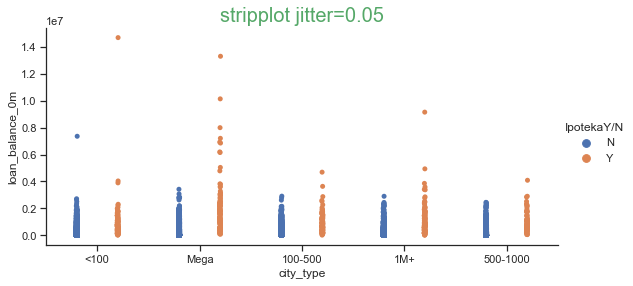

In [45]:
# Категорийные диаграммы, sns.catplot()

sns.set(style="ticks", color_codes=True)

day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type',
    y='loan_balance_0m', 
    data=df, 
    hue='IpotekaY/N',    # оба на одном графике разными цветами
    order=day_order, 
    jitter=0.01,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');

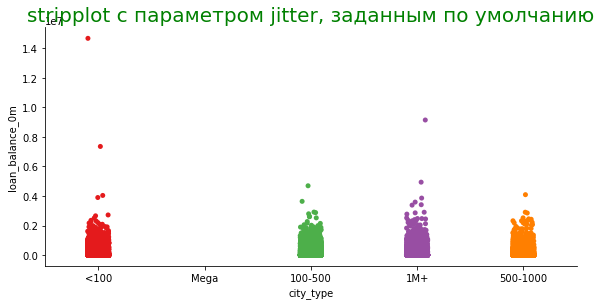

In [12]:
sns.catplot(
    x='city_type',
    y='loan_balance_0m', 
    data=df.query("city_type != 'Mega'"), 
    order=['<100', 'Mega', '100-500', '1M+', '500-1000'],
    palette='Set1', 
#     jitter=False, выстраивает все точки в линию
    height=4,
    aspect=2); 

plt.title('stripplot с параметром jitter, заданным по умолчанию', size=20, color='g');

F:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


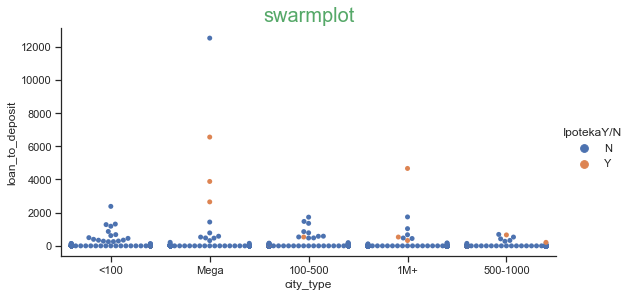

In [50]:
sns.catplot(
    x='city_type',
    y='loan_to_deposit',
    data=df, 
    order=day_order, 
    hue='IpotekaY/N',
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

In [13]:
long_sales = pd.melt(df_1, var_name='Item', value_name='Sales',
            id_vars=['age', 'gender', 'city_type', 'full_mob', 'avgtrx_to_balance', 'income', 'IpotekaY/N'])
long_sales.shape         
long_sales.head()

(250000, 9)

,age,gender,city_type,full_mob,avgtrx_to_balance,income,IpotekaY/N,Item,Sales
0,71,NaN,<100,103,NaN,0.0,N,ml_balance,0.0
1,49,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
2,56,NaN,Mega,81,0.083467,0.0,N,ml_balance,0.0
3,47,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
4,74,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0


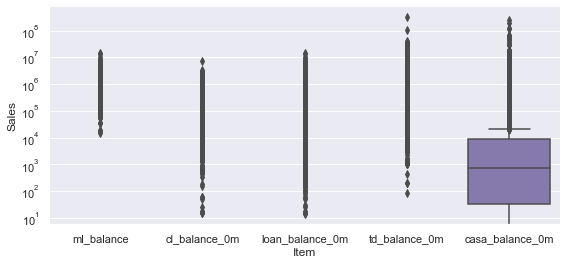

In [122]:
# boxplot(), kind='box'
# boxnplot(), kind='boxn'

sns.set(style='darkgrid')
day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    height=4, 
    aspect=2
);
plt.yscale(value='log')

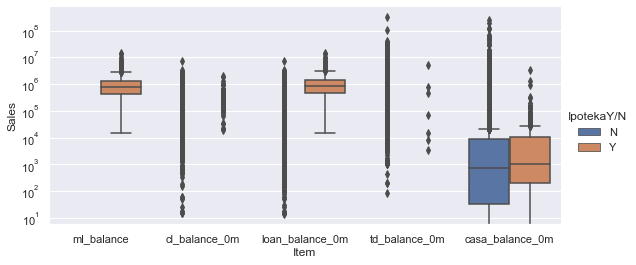

In [123]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    hue='IpotekaY/N',
    height=4, 
    aspect=2);
plt.yscale(value='log')

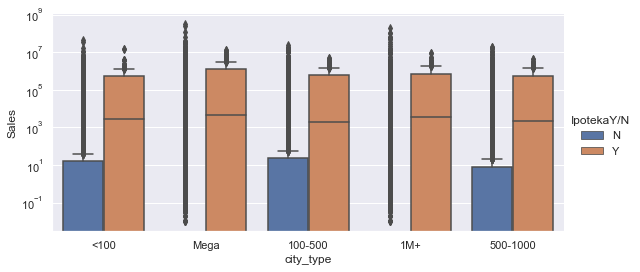

In [125]:
sns.catplot(
    x='city_type', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    hue='IpotekaY/N', 
    order=day_order, 
    height=4, 
    aspect=2); 
plt.yscale(value='log')

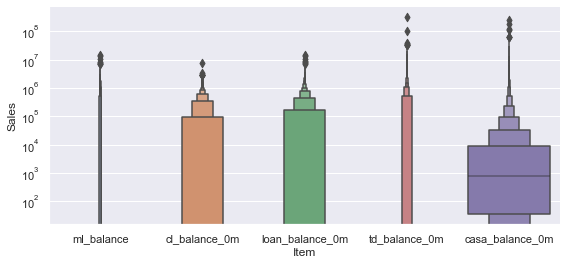

In [126]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='boxen', 
    height=4, 
    aspect=2); 
plt.yscale(value='log')

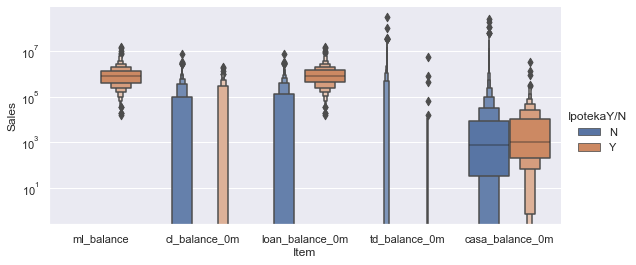

In [127]:
sns.catplot(
    x='Item',
    y='Sales',
    data=long_sales,
    kind='boxen',
    hue='IpotekaY/N',
    height=4, 
    aspect=2);
plt.yscale(value='log')

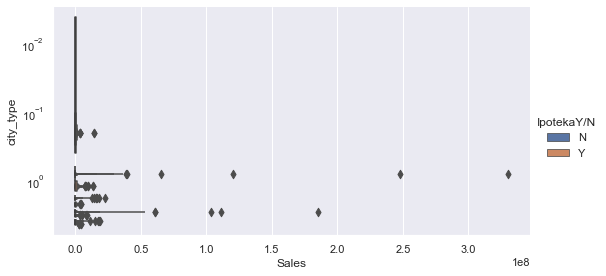

In [133]:
sns.catplot(
    x='Sales', 
    y='city_type', 
    data=long_sales, 
    kind='boxen', 
    hue='IpotekaY/N',
    order=day_order, 
    height=4, 
    aspect=2);
plt.yscale(value='log')

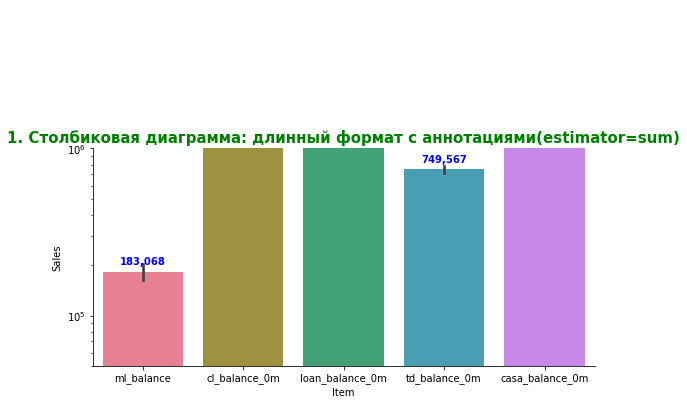

In [103]:
# barplot(), kind='bar'
# countplot(), kind='count'

from numpy import median

plt.figure(figsize=(9,4))
b = sns.barplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    estimator=sum, 
    palette='husl')

b.set(yscale='log', ylim=[50000, 1000000])
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

plt.title('1. Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=15, color='g', 
          weight='bold');

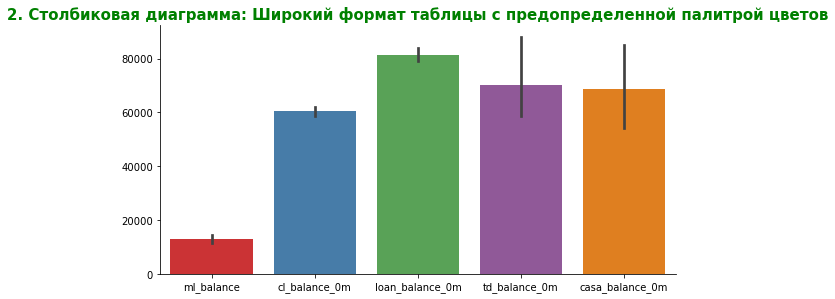

In [105]:
sns.catplot(
    data=df, 
    kind='bar', 
    height=4, 
    aspect=2,   
    order=['ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m',
       'casa_balance_0m'],
    palette="Set1"
); 
plt.title('2. Столбиковая диаграмма: Широкий формат таблицы с предопределенной палитрой цветов', size=15, color='g', 
          weight='bold');

In [18]:
long_sales.Item.unique()

array(['ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m',
       'casa_balance_0m'], dtype=object)

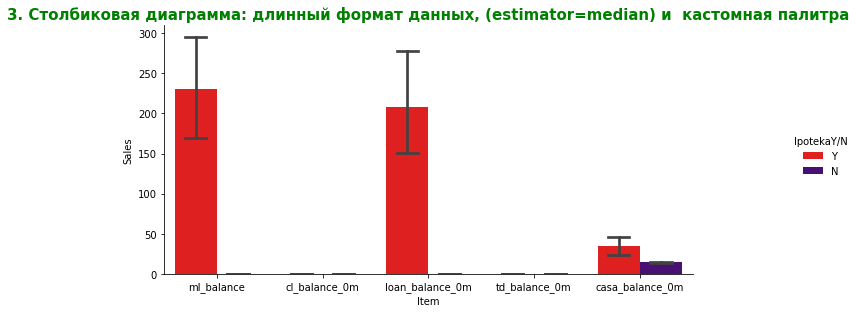

In [102]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='bar', 
    hue='IpotekaY/N', 
    hue_order=['Y','N'], 
    palette={"Y": "r", "N": "indigo"},
    estimator=median, 
    capsize=0.2, 
    height=4, 
    aspect=2); 

plt.title('3. Столбиковая диаграмма: длинный формат данных, (estimator=median) и  кастомная палитра',
          size=15, 
          color='g', 
          weight='bold');

In [12]:
long_sales = pd.melt(df_1, var_name='Item', value_name='Sales',
            id_vars=['age', 'gender', 'city_type', 'full_mob', 'avgtrx_to_balance', 'income', 'IpotekaY/N'])
long_sales.shape         
long_sales.head()

(250000, 9)

,age,gender,city_type,full_mob,avgtrx_to_balance,income,IpotekaY/N,Item,Sales
0,71,NaN,<100,103,NaN,0.0,N,ml_balance,0.0
1,49,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
2,56,NaN,Mega,81,0.083467,0.0,N,ml_balance,0.0
3,47,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
4,74,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0


In [13]:
long_sales.Sales = long_sales.Sales.astype(int)
long_sales.Sales.unique()

array([     0, 167178, 686677, ..., 261314,  42517,   8240])

In [14]:
a = long_sales.Sales
c = []
for i in a:
    if i > 1000:
        c.append(i/1000)
    else:
        c.append(i)
long_sales['Sales'] = c
long_sales['Sales'] = long_sales.Sales.astype(int)
long_sales.Sales.max()

330500

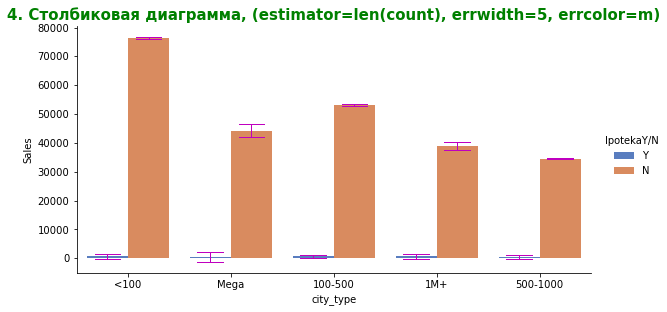

In [18]:
day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type', 
    y='Sales', 
    data=long_sales, 
    kind='bar', 
    hue='IpotekaY/N', 
    ci='sd',
    estimator=len, 
    capsize=0.25, 
    errcolor='m', 
    errwidth=1,
    hue_order=['Y','N'], 
    palette="muted", 
    order=day_order, 
    height=4, 
    aspect=2);
plt.title('4. Столбиковая диаграмма, (estimator=len(count), errwidth=5, errcolor=m)',
          size=15, 
          color='g', 
          weight='bold'
         );

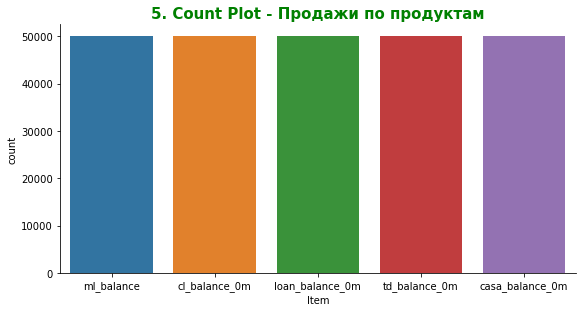

In [119]:
sns.catplot(x='Item', 
            data=long_sales, 
            kind='count', 
            height=4, 
            aspect=2
           );  # long form data frame
plt.title('5. Count Plot - Продажи по продуктам', size=15, color='g', weight='bold');

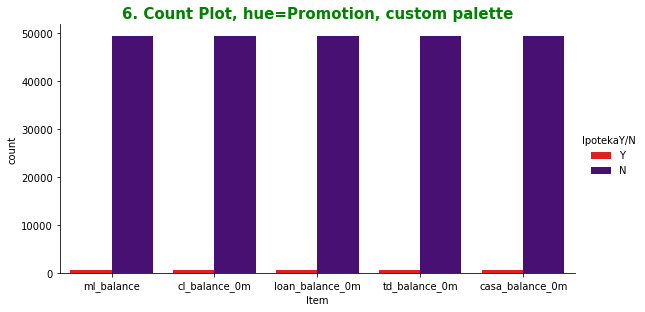

In [120]:
sns.catplot(
    x='Item', 
    data=long_sales, 
    kind='count', 
    hue='IpotekaY/N', 
    hue_order=['Y','N'], 
    palette={"Y": "r", "N": "indigo"}, 
    height=4, 
    aspect=2); 
plt.title('6. Count Plot, hue=Promotion, custom palette', size=15, color='g', weight='bold');

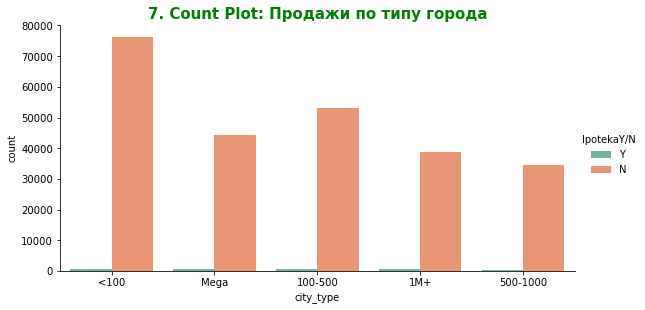

In [121]:
sns.catplot(
    x='city_type', 
    data=long_sales, 
    kind='count', 
    hue='IpotekaY/N', 
    hue_order=['Y','N'], 
    palette="Set2", 
    order=day_order, 
    height=4, 
    aspect=2);
plt.title('7. Count Plot: Продажи по типу города', size=15, color='g', weight='bold');

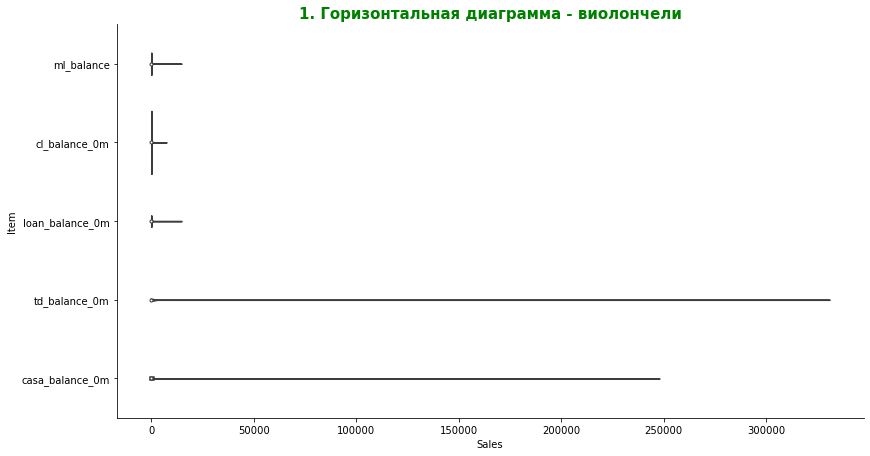

In [122]:
# violinplot(), kind='violin'

sns.catplot(
    x='Sales',
    y='Item',
    data=long_sales,
    kind='violin',
    height=6,
    aspect=2)
plt.title('1. Горизонтальная диаграмма - виолончели', size=15, color='g', weight='bold');

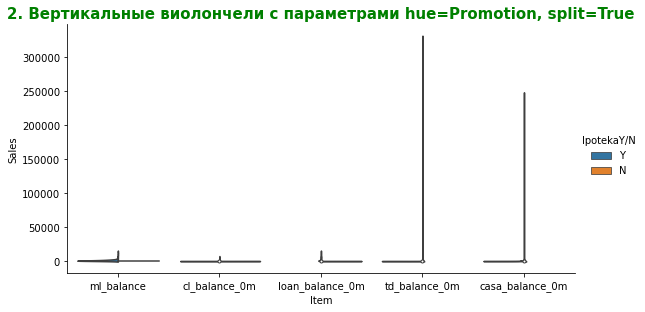

In [124]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='violin', 
    hue='IpotekaY/N', 
    hue_order=["Y", "N"], 
    split=True, 
    height=4, 
    aspect=2) 

plt.title('2. Вертикальные виолончели с параметрами hue=Promotion, split=True', size=15, color='g', weight='bold');

In [ ]:
day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type', 
    y='Sales', 
    data=long_sales, 
    kind='violin', 
    order=day_order, 
    hue='IpotekaY/N', 
    hue_order=["Y", "N"], 
    split=True, 
    inner="stick", 
    palette="pastel",
    height=4, 
    aspect=2)
plt.title('3. Виолончели с параметрами hue=IpotekaY/N, split=True, inner=stick', size=15, color='g', weight='bold');

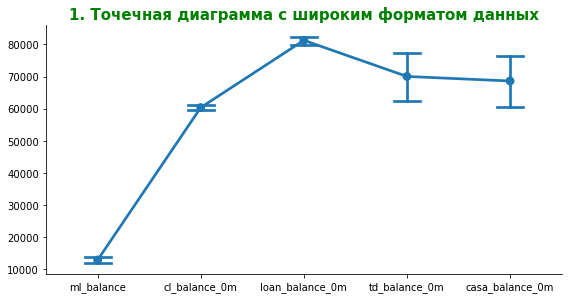

In [10]:
# pointplot(), kind='point'

sns.catplot(
    data=df, 
    kind='point', 
    ci=68, 
    capsize=0.25, 
    height=4,        # wide form df
    aspect=2, 
    order=['ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m',
       'casa_balance_0m']
)
plt.title('1. Точечная диаграмма с широким форматом данных', size=15, color='g', weight='bold');

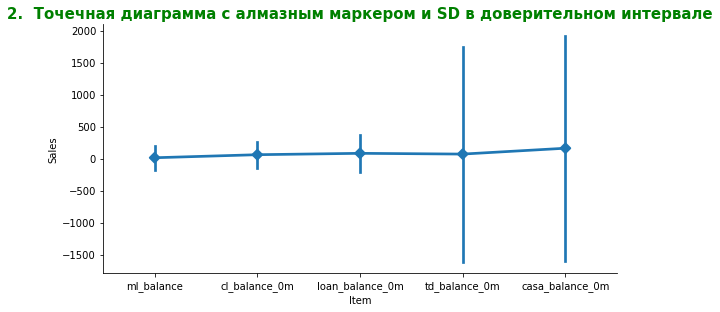

In [15]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, # long form data frame
    kind='point', 
    markers='D', 
    ci='sd',
    height=4, 
    aspect=2)  
plt.title('2.  Точечная диаграмма с алмазным маркером и SD в доверительном интервале', size=15, color='g', weight='bold');

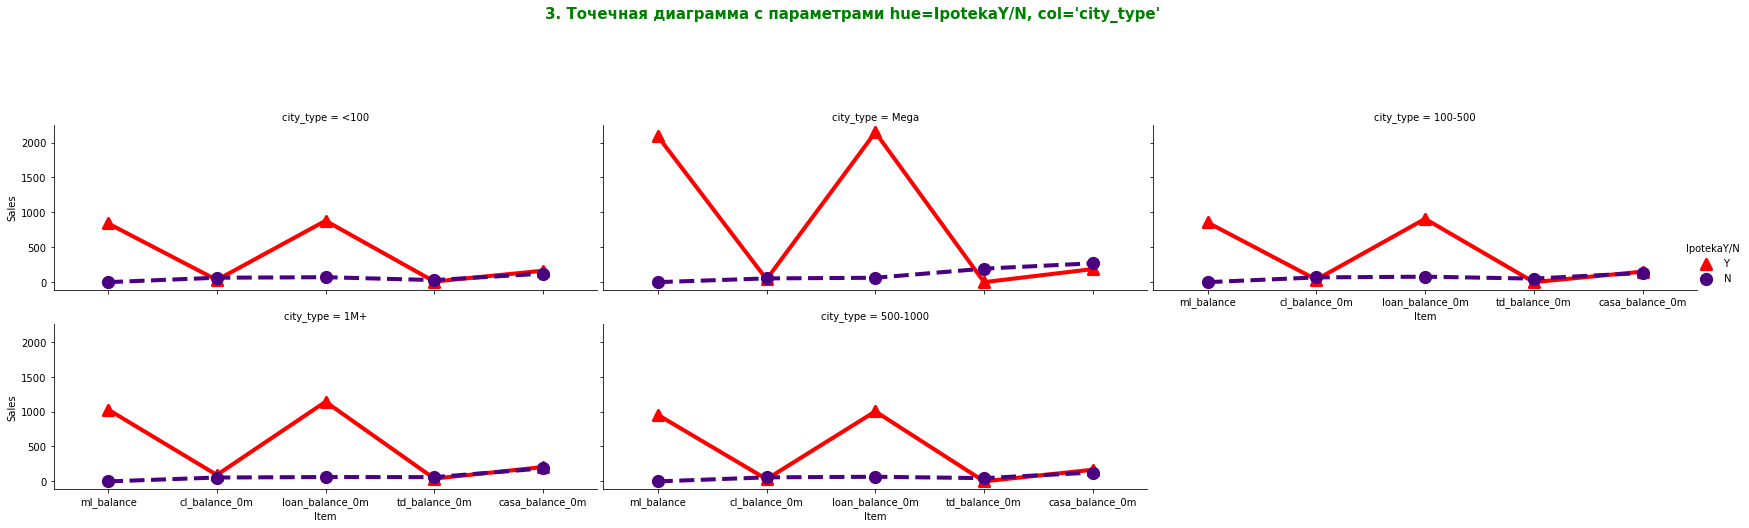

In [16]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='point', 
    hue='IpotekaY/N', 
    hue_order=['Y','N'], 
    palette={"Y": "r", "N": "indigo"},
    markers=["^", "o"], 
    linestyles=["-", "--"], 
    ci=None, 
    col='city_type', 
    col_wrap=3,
    height=4, 
    aspect=2, 
    scale=1.5)
plt.suptitle("3. Точечная диаграмма с параметрами hue=IpotekaY/N, col='city_type'", size=15, color='g', weight='bold')
plt.tight_layout(pad=5,w_pad=0.25, h_pad=0.25);

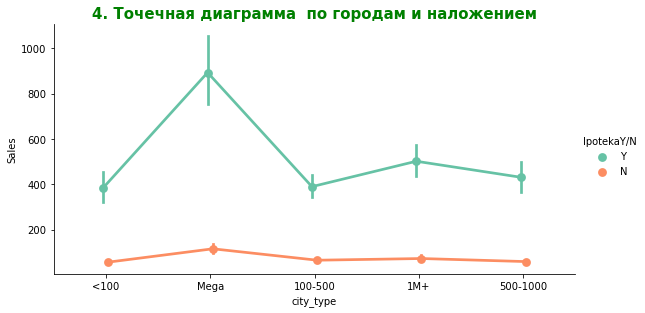

In [20]:
sns.catplot(
    x='city_type', 
    y='Sales', 
    data=long_sales, 
    kind='point', 
    hue='IpotekaY/N',
    dodge=True,
    hue_order=['Y','N'], 
    palette="Set2", 
    order=day_order, 
    height=4, 
    aspect=2)
plt.title('4. Точечная диаграмма  по городам и наложением', size=15, color='g', weight='bold');

C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


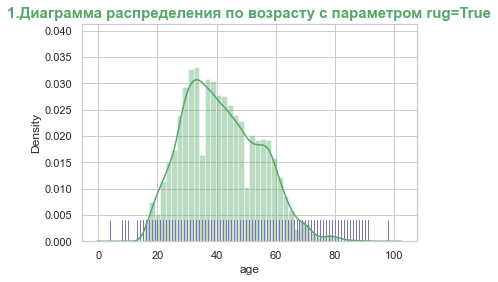

In [26]:
# Диаграммы распределения

# distplot()
# rugplot()
# kdeplot()

# distplot() and rugplot()

sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.age,
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения по возрасту с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

In [21]:
df_1.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,avgtrx_to_balance,income,IpotekaY/N
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,NaN,0.0,N
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,NaN,0.0,N
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,0.083467,0.0,N
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,NaN,0.0,N
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,NaN,0.0,N


In [ ]:
age возраст
gender пол repexc_date
city_type Тип города проживания клиента
full_mob Длительность взаимоотношений с банком
ml_balance ипотека
cl_balance_0m потребительский кредит
loan_balance_0m все кредиты
td_balance_0m депозит
casa_balance_0m счета
avgtrx_to_balance
income доход клиента
IpotekaY/N

C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


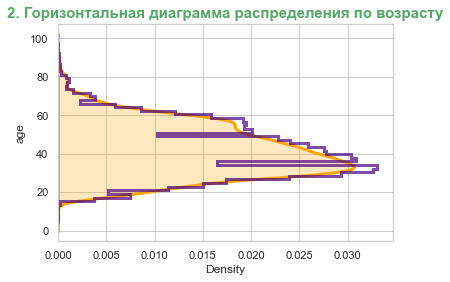

In [27]:
sns.distplot(
    df.age,
    vertical=True,                #hist=False
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})           
plt.title('2. Горизонтальная диаграмма распределения по возрасту', size=15, color='g', weight='bold')             
plt.show();

C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


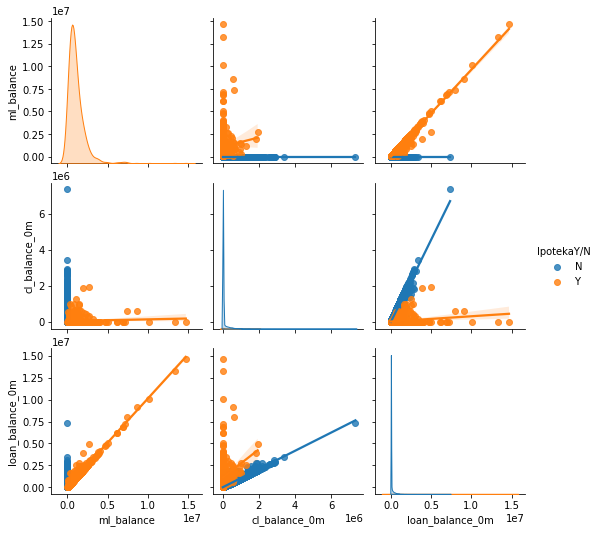

In [11]:
# pairplot()

snacks_sales_items = df_1.loc[:,['ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'IpotekaY/N']]
sns.pairplot(
    snacks_sales_items,
    hue='IpotekaY/N',
    kind='reg'
)
plt.show();

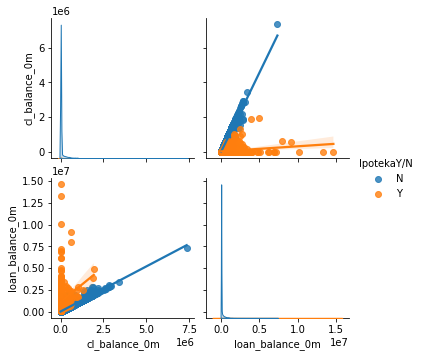

In [12]:
sns.pairplot(
    snacks_sales_items,
    vars=['cl_balance_0m', 'loan_balance_0m'],
    hue='IpotekaY/N', kind='reg')
plt.show();

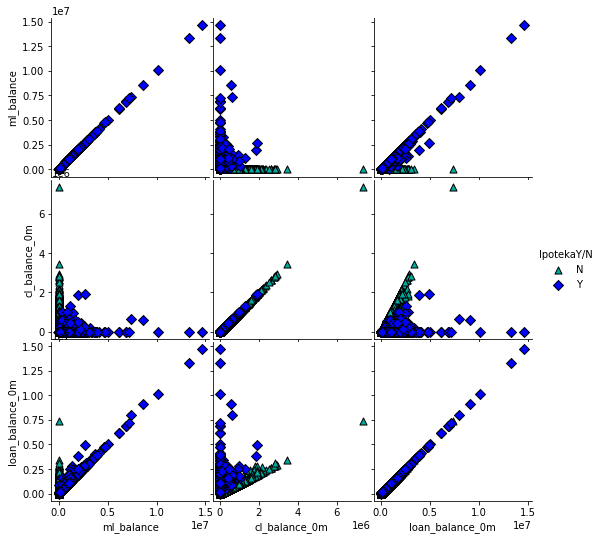

In [13]:
#  PairGrid()

g = sns.PairGrid(
    snacks_sales_items, 
    hue='IpotekaY/N', 
    hue_kws={"marker": ["^", "D"]}, 
    palette={'Y': 'blue', 'N': '#00a99f05'}
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

In [14]:
long_sales.head()

,age,gender,city_type,full_mob,avgtrx_to_balance,income,IpotekaY/N,Item,Sales
0,71,NaN,<100,103,NaN,0.0,N,ml_balance,0.0
1,49,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
2,56,NaN,Mega,81,0.083467,0.0,N,ml_balance,0.0
3,47,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
4,74,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0


In [46]:
# Матричные диаграммы

# Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

sales = pd.DataFrame(long_sales.groupby(["Item", "city_type"]).Sales.mean())
sales = sales.reset_index()
sales = sales.pivot('city_type','Item', 'Sales')
sales.casa_balance_0m = sales.casa_balance_0m.astype(int)
sales.cl_balance_0m = sales.cl_balance_0m.astype(int)
sales.loan_balance_0m = sales.loan_balance_0m.astype(int)
sales.ml_balance = sales.ml_balance.astype(int)
sales.td_balance_0m = sales.td_balance_0m.astype(int)
sales.head()

Item,casa_balance_0m,cl_balance_0m,loan_balance_0m,ml_balance,td_balance_0m
city_type,,,,,
100-500,39305,67425,87603,10124,49929
1M+,98512,56129,79938,17193,60473
500-1000,38067,56742,74968,10097,46269
<100,23621,63142,77696,7644,29479
Mega,178621,53533,85903,23568,190899


KeyError: 3

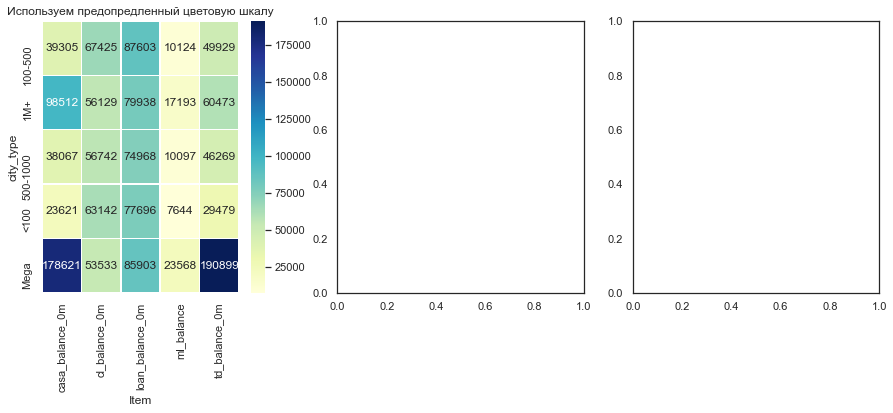

In [53]:
# Set up axes on which to plot various plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu", 
    ax=ax1)
ax1.set_title('Используем предопредленный цветовую шкалу')

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True,
    cmap="YlGnBu", 
    center=sales.loc[3, 'loan_balance_0m'],
    yticklabels=False, 
    ax=ax2)

ax2.set_title("Цветовая шкала центриloan_balance_0mрована [3, 'loan_balance_0m']")

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True, 
    vmin=200, 
    vmax=600,
    cmap="YlGnBu", 
    yticklabels=False, 
    ax=ax3)
ax3.set(title='Цветовая шкала (200, 600)', ylabel='')


plt.tight_layout()
plt.show();

In [54]:
df_1.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,avgtrx_to_balance,income,IpotekaY/N
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,NaN,0.0,N
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,NaN,0.0,N
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,0.083467,0.0,N
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,NaN,0.0,N
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,NaN,0.0,N


In [68]:
city_type_map = {'<100':'small', '100-500':'small', '500-1000':'average', '1M+':'average', 'Mega': 'big'}
df_1['City'] = df_1['city_type'].map(city_type_map)
corr = df_1.corr()
df_1.head()
set(df_1.city_type)
corr

<ipython-input-68-9b523a189a34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['City'] = df_1['city_type'].map(city_type_map)


,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,avgtrx_to_balance,income,IpotekaY/N,City
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,NaN,0.0,N,small
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,NaN,0.0,N,big
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,0.083467,0.0,N,big
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,NaN,0.0,N,big
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,NaN,0.0,N,big


{'100-500', '1M+', '500-1000', '<100', 'Mega'}

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,avgtrx_to_balance,income
age,1.000000,0.278095,0.005730,0.003346,0.010135,0.049813,0.026663,0.000874,0.009509
full_mob,0.278095,1.000000,0.066694,0.095045,0.130913,0.013962,0.011671,-0.005283,0.010622
ml_balance,0.005730,0.066694,1.000000,0.001244,0.658112,-0.002642,-0.001646,-0.000557,0.000373
cl_balance_0m,0.003346,0.095045,0.001244,1.000000,0.733257,-0.011878,-0.005663,-0.002494,0.028787
loan_balance_0m,0.010135,0.130913,0.658112,0.733257,1.000000,-0.011178,-0.005749,0.001041,0.022902
td_balance_0m,0.049813,0.013962,-0.002642,-0.011878,-0.011178,1.000000,0.664375,0.000233,0.002913
casa_balance_0m,0.026663,0.011671,-0.001646,-0.005663,-0.005749,0.664375,1.000000,-0.000507,0.008150
avgtrx_to_balance,0.000874,-0.005283,-0.000557,-0.002494,0.001041,0.000233,-0.000507,1.000000,-0.004796
income,0.009509,0.010622,0.000373,0.028787,0.022902,0.002913,0.008150,-0.004796,1.000000


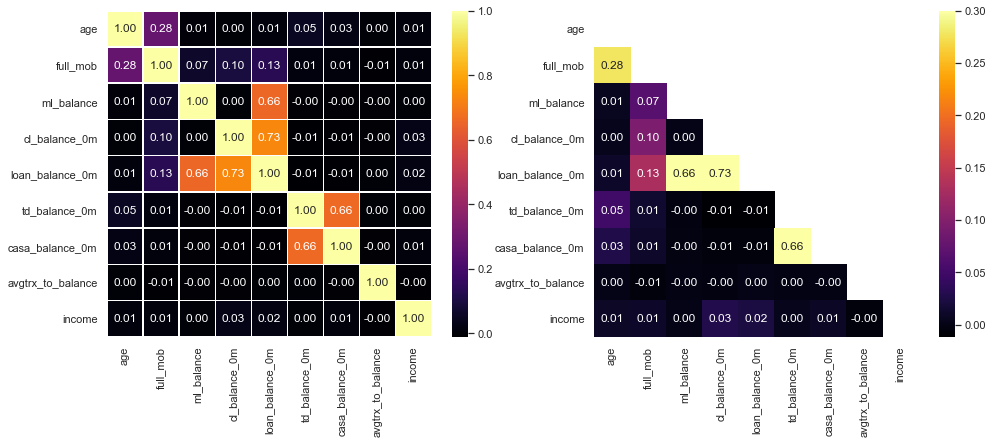

In [66]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6)) 

sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1)

mask = np.zeros_like(corr)
np.triu_indices_from(mask)
mask[np.triu_indices_from(mask)] = True
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="inferno", ax=ax2)
plt.show();

In [71]:
# Clustermaps

row_colors = df_1["City"].map(dict(zip(df_1["City"].unique(), "rbg")))
row_colors

0        r
1        b
2        b
3        b
4        b
        ..
49995    r
49996    b
49997    g
49998    r
49999    r
Name: City, Length: 50000, dtype: object

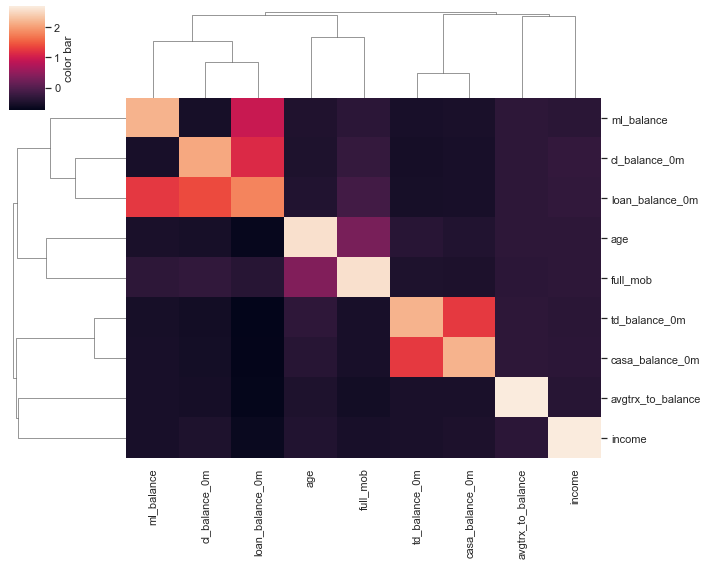

In [72]:
g = sns.clustermap(
    corr, 
    figsize=(10,8),  
    z_score=1, 
    cbar_kws={"label": "color bar"}
)